In [1]:
# improt libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
d_f = pd.read_csv('Book-01.csv')

In [3]:
d_f.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Training Times Last Year',
       'Age', 'CF_attrition count', 'CF_attrition rate', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [4]:
d_f[['Performance Rating','Age','Distance From Home','Monthly Income','Job Involvement','Environment Satisfaction']].describe()

,Performance Rating,Age,Distance From Home,Monthly Income,Job Involvement,Environment Satisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,3.153741,36.923810,9.192517,6502.931293,2.729932,2.810204
std,0.360824,9.135373,8.106864,4707.956783,0.711561,1.103879
min,3.000000,18.000000,1.000000,1009.000000,1.000000,1.000000
25%,3.000000,30.000000,2.000000,2911.000000,2.000000,2.000000
50%,3.000000,36.000000,7.000000,4919.000000,3.000000,3.000000
75%,3.000000,43.000000,14.000000,8379.000000,3.000000,4.000000
max,4.000000,60.000000,29.000000,19999.000000,4.000000,4.000000


In [5]:
# CHI-2 TEST

In [6]:
contigency_table = pd.crosstab(d_f['Attrition'], d_f['Gender'])
contigency_table

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [7]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 1.1169671241970975
p-value: 0.29057244902890855
Degrees of freedom: 1
Expected:
 [[493.2 739.8]
 [ 94.8 142.2]]


In [8]:
if p<0.05:
    print("Accept the hyp")
else:
    print("Rej the hyp")

Rej the hyp


In [9]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(d_f['Age'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 2.036924313471409e-14, Sample does not look Gaussian/Normally Distributed (reject H0)


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.multivariate.manova as manova
from scipy.stats import chi2_contingency

In [11]:
ct2 = contigency_table = pd.crosstab(d_f['Attrition'],d_f['Marital Status'])
print(ct2)

Marital Status  Divorced  Married  Single
Attrition                                
No                   294      589     350
Yes                   33       84     120


In [12]:
# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(ct2)

# output results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

# print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 46.163676540848705
P-value: 9.45551106034083e-11
Degrees of Freedom: 2
Expected: 
 [[274.27959184 564.49591837 394.2244898 ]
 [ 52.72040816 108.50408163  75.7755102 ]]
Reject null hypothesis, there is a significant difference between the groups


In [13]:
# T - test

In [14]:
# shpiro wilk test to see the normality of the data
statistic, p = stats.shapiro(d_f['Age'])
# print the results based on p value and if else conditions
if p < 0.05:
    print("Reject null hypothesis, data is not normally distributed")
else:
    print("Fail to reject null hypothesis, data is normally distributed")

Reject null hypothesis, data is not normally distributed


<Axes: xlabel='Age', ylabel='Count'>

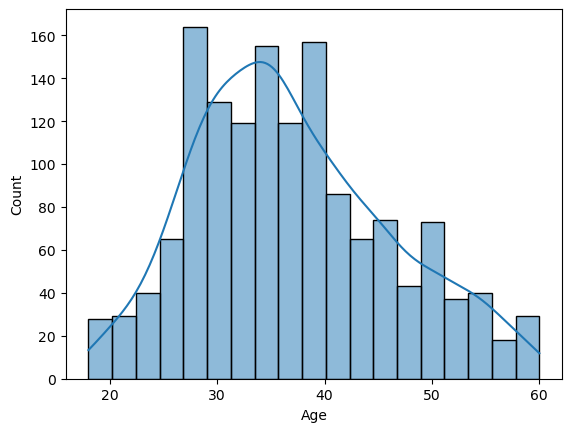

In [15]:
# graphical Method
sns.histplot(data=d_f, x='Age', kde=True)

In [16]:
d_f['Age'].mean()

36.923809523809524

In [17]:
statistic, p = stats.ttest_1samp(d_f['Age'], 32)

# print the results based on p value and if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Reject null hypothesis, there is a significant difference between the groups


In [18]:
# 2. Two sample independent t-test

In [19]:
# lets run the two sample t test on ages of male and female from HR db

age_male = d_f[d_f['Gender'] == 'Male']['Age']
age_female = d_f[d_f['Gender'] == 'Female']['Age']

statistic, p = stats.ttest_ind(age_male, age_female)

# print the results based on p value and if else conditions
if p < 0.05:
    print(f"Reject null hypothesis, because p vaule: {p} , there is a significant difference between ages of male and female employees")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {p}, there is not any differences between ages of female and male employees.")

Fail to reject null hypothesis,because p vaule: 0.16409141231818586, there is not any differences between ages of female and male employees.


In [20]:
# Anova

In [21]:
# 1-way Anova

In [22]:
# ANOVa test for age and class
model = ols("Age ~ Gender", data=d_f).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# print the results based on p value and if else conditions
if anova_table['PR(>F)'][0] < 0.05:
    print(f"Reject null hypothesis, because p vaule: {anova_table['PR(>F)'][0]} , there is a significant difference between ages of employees in different gender.")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {anova_table['PR(>F)'][0]}, there is not any differences between ages of employees in different gender.")

                 sum_sq      df         F    PR(>F)
Gender       161.636735     1.0  1.938049  0.164091
Residual  122433.829932  1468.0       NaN       NaN
Fail to reject null hypothesis,because p vaule: 0.16409141231816354, there is not any differences between ages of employees in different gender.


C:\Users\Bilawal\AppData\Local\Temp\ipykernel_19920\3122692430.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_19920\3122692430.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Fail to reject null hypothesis,because p vaule: {anova_table['PR(>F)'][0]}, there is not any differences between ages of employees in different gender.")


In [23]:
pd.pivot_table(d_f,index='CF_age band',values='Performance Rating',aggfunc=['mean'])

,mean
,Performance Rating
CF_age band,
25 - 34,3.155235
35 - 44,3.148515
45 - 54,3.146939
Over 55,3.188406
Under 25,3.164948


In [24]:
# Tukey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=d_f['Performance Rating'], groups=d_f['CF_age band'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
25 - 34,35 - 44,-0.0067,0.9982,-0.0674,0.054,False
25 - 34,45 - 54,-0.0083,0.9983,-0.084,0.0674,False
25 - 34,Over 55,0.0332,0.9521,-0.0928,0.1591,False
25 - 34,Under 25,0.0097,0.9992,-0.0989,0.1183,False
35 - 44,45 - 54,-0.0016,1.0,-0.0784,0.0752,False
35 - 44,Over 55,0.0399,0.9112,-0.0867,0.1665,False
35 - 44,Under 25,0.0164,0.994,-0.0929,0.1258,False
45 - 54,Over 55,0.0415,0.9173,-0.093,0.1759,False
45 - 54,Under 25,0.018,0.9938,-0.1003,0.1364,False
Over 55,Under 25,-0.0235,0.9939,-0.1788,0.1319,False


In [25]:
# 2-way Anova

In [26]:
d_f = d_f.rename(columns={
    'Business Travel': 'Business_Travel',
    'CF_age band': 'CF_age_band',
    'Marital Status':'Marital_Status',
    'Performance Rating':'Performance_Rating',
    'Education Field':'Education_Field'
    })

In [27]:
# ANOVa test for age and class
# model = ols("age ~ pclass + who + pclass:who", data=df).fit()
# or this
model = ols("Performance_Rating ~ Gender * Marital_Status", data=d_f).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df         F    PR(>F)
Gender                   0.034798     1.0  0.266688  0.605640
Marital_Status           0.023537     2.0  0.090195  0.913758
Gender:Marital_Status    0.170113     2.0  0.651870  0.521222
Residual               191.024037  1464.0       NaN       NaN


<Axes: xlabel='None-Marital_Status', ylabel='CF_age_band'>

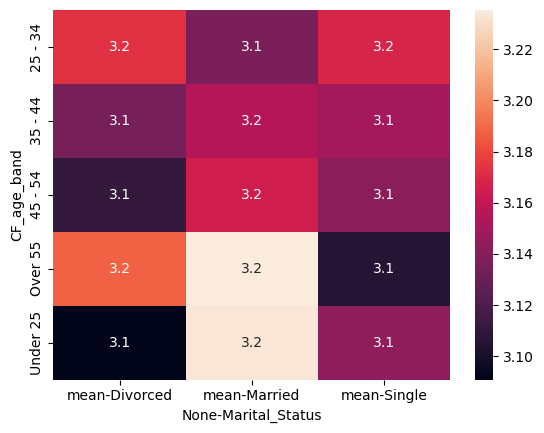

In [28]:
sns.heatmap(pd.pivot_table(d_f,index='CF_age_band',values='Performance_Rating',columns='Marital_Status',aggfunc=['mean']),annot=True)

In [29]:
tukey = pairwise_tukeyhsd(d_f['Performance_Rating'], d_f['Gender'] + d_f['Marital_Status'] , alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
FemaleDivorced,FemaleMarried,0.0104,0.9998,-0.1036,0.1244,False
FemaleDivorced,FemaleSingle,-0.0217,0.9956,-0.1418,0.0984,False
FemaleDivorced,MaleDivorced,-0.0243,0.9922,-0.1432,0.0946,False
FemaleDivorced,MaleMarried,-0.0153,0.9987,-0.1236,0.093,False
FemaleDivorced,MaleSingle,-0.0,1.0,-0.1141,0.114,False
FemaleMarried,FemaleSingle,-0.0321,0.9326,-0.1282,0.0641,False
FemaleMarried,MaleDivorced,-0.0347,0.9023,-0.1294,0.06,False
FemaleMarried,MaleMarried,-0.0257,0.9454,-0.1066,0.0553,False
FemaleMarried,MaleSingle,-0.0104,0.9994,-0.0989,0.078,False
FemaleSingle,MaleDivorced,-0.0026,1.0,-0.1046,0.0994,False
